In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Pythondatasets/Mjesecni_Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv', parse_dates=True, index_col='Date (LT)')
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
Date (LT),,,,,,,,,,,,,
2018-05-27 02:00:00,Sarajevo,PM2.5 - Principal,2018,5,27,2,40.6,114,Unhealthy for Sensitive Groups,64.0,UG/M3,1 Hr,Valid
2018-06-17 21:00:00,Sarajevo,PM2.5 - Principal,2018,6,17,21,42.6,118,Unhealthy for Sensitive Groups,43.0,UG/M3,1 Hr,Valid
2018-07-14 21:00:00,Sarajevo,PM2.5 - Principal,2018,7,14,21,49.4,135,Unhealthy for Sensitive Groups,71.0,UG/M3,1 Hr,Valid
2018-08-11 16:00:00,Sarajevo,PM2.5 - Principal,2018,8,11,16,55.1,149,Unhealthy for Sensitive Groups,63.0,UG/M3,1 Hr,Valid
2018-09-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,9,22,19,41.9,117,Unhealthy for Sensitive Groups,46.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03 00:00:00,Sarajevo,PM2.5 - Principal,2023,5,3,0,35.0,99,Moderate,37.0,UG/M3,1 Hr,Valid
2023-06-22 00:00:00,Sarajevo,PM2.5 - Principal,2023,6,22,0,56.8,152,Unhealthy,59.0,UG/M3,1 Hr,Valid
2023-07-09 18:00:00,Sarajevo,PM2.5 - Principal,2023,7,9,18,54.8,149,Unhealthy for Sensitive Groups,67.0,UG/M3,1 Hr,Valid


In [3]:
df_aqi = data[['AQI']]
df_aqi

,AQI
Date (LT),
2018-05-27 02:00:00,114
2018-06-17 21:00:00,118
2018-07-14 21:00:00,135
2018-08-11 16:00:00,149
2018-09-22 19:00:00,117
...,...
2023-05-03 00:00:00,99
2023-06-22 00:00:00,152
2023-07-09 18:00:00,149


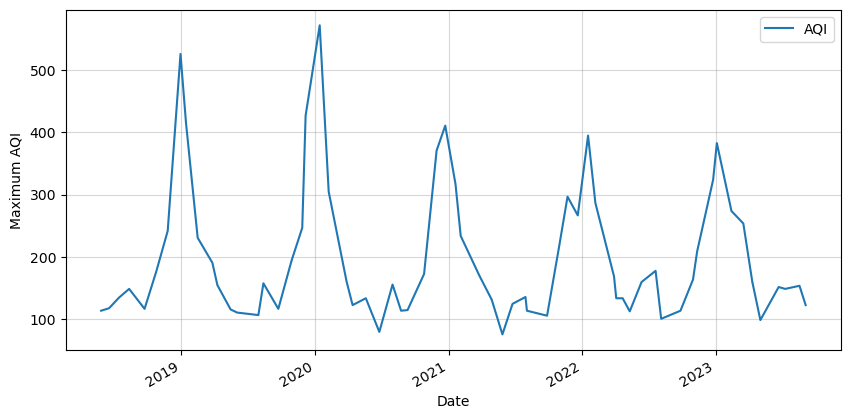

In [6]:
df_aqi.plot(figsize=(10,5))
plt.grid(alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.show()

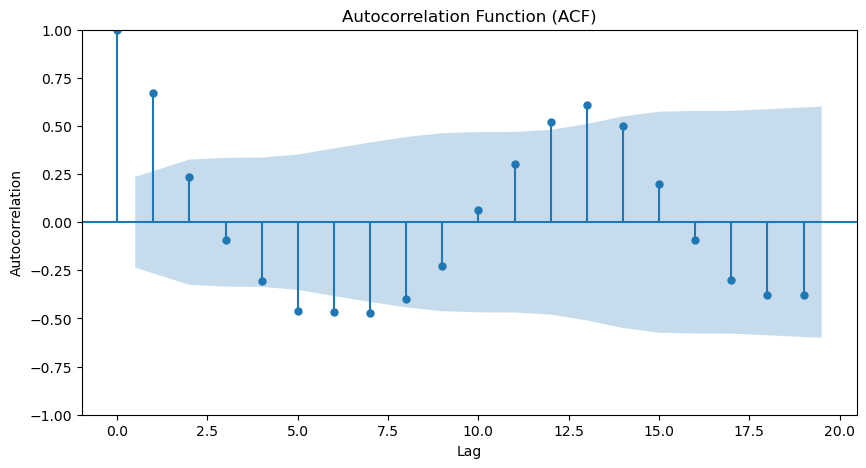

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


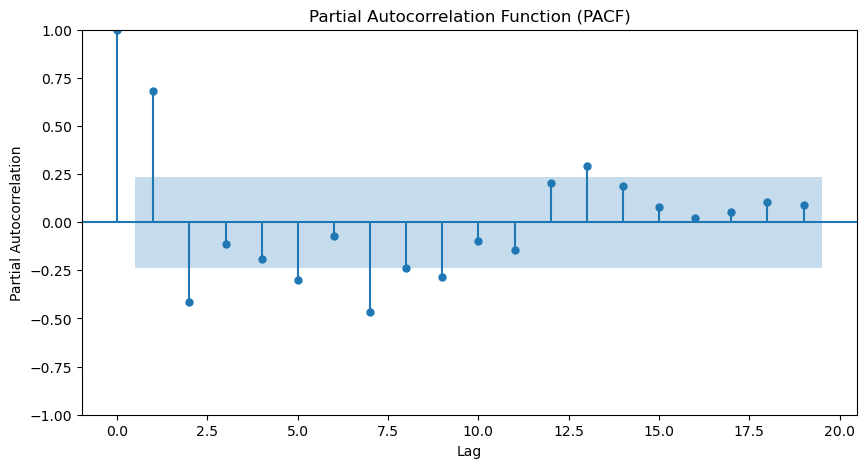

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_aqi, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_aqi, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

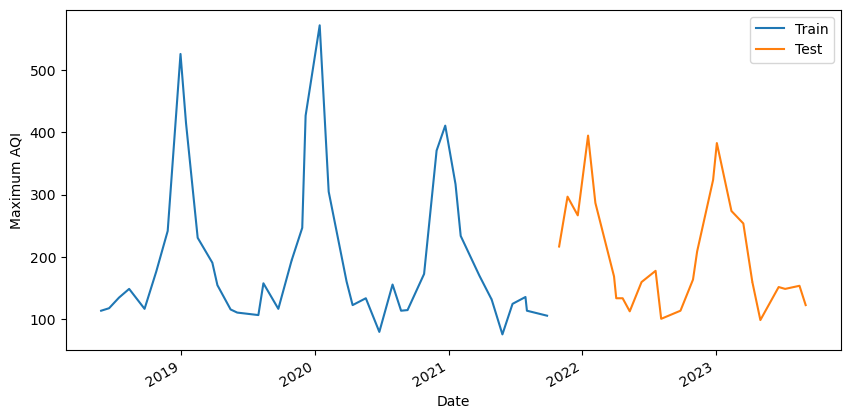

In [5]:
df_train = df_aqi.loc[:'10-29-2021 10:00:00']
df_test = df_aqi.loc['10-29-2021 10:00:00':]

# Plot the last 10 years of training data and the 2 of testing
ax = df_train.plot(figsize=(10, 5))
df_test.plot(ax=ax)
plt.legend(['Train', 'Test'])
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.show()

In [9]:
import itertools
import math
import statsmodels.api as sm


# Define the range of values for p, d, q, P, D, Q, and m
p_values = range(0, 3)  # Autoregressive order
d_values = [0]          # Differencing order
q_values = range(0, 3)  # Moving average order
P_values = range(0, 2)  # Seasonal autoregressive order
D_values = range(0, 1)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order
m_values = [12]         # Seasonal period

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values))

# Initialize AIC with a large value
best_aic = float("inf")  
best_params = None

# Perform grid search
for params in param_combinations:
    order = params[:3]
    seasonal_order = params[3:]
    
    
    model = sm.tsa.SARIMAX(df_aqi, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)
    aic = result.aic
    print(result)
        # Ensure the convergence of the model
    if not math.isinf(result.zvalues.mean()):
        print(order, seasonal_order, aic)
        
        if aic < best_aic:
            best_aic = aic
            best_params = params
                
    else:
        print(order, seasonal_order, 'not converged')

    

# Print the best parameters and AIC
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(0, 0, 0) (0, 0, 0, 12) 945.2612842700877
(0, 0, 0) (0, 0, 1, 12) 897.7453770451173
(0, 0, 0) (1, 0, 0, 12) 843.8663553319323


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 0, 1, 12) 843.3670436889844
(0, 0, 1) (0, 0, 0, 12) 882.3014153912687


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, f

(0, 0, 1) (0, 0, 1, 12) 846.5492199936399


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 1) (1, 0, 0, 12) 818.0952594461118


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 1) (1, 0, 1, 12) 815.5762586952311
(0, 0, 2) (0, 0, 0, 12) 844.2045394121893


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(0, 0, 2) (0, 0, 1, 12) 828.2397656150249


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (1, 0, 0, 12) 815.2112285423001


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (1, 0, 1, 12) 810.5208499766384
(1, 0, 0) (0, 0, 0, 12) 813.3922673249192


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(1, 0, 0) (0, 0, 1, 12) 812.2131369462528
(1, 0, 0) (1, 0, 0, 12) 810.983046979015


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(1, 0, 0) (1, 0, 1, 12) 811.1015710849288
(1, 0, 1) (0, 0, 0, 12) 811.3898969922449


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(1, 0, 1) (0, 0, 1, 12) 810.8438364234856


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 0, 0, 12) 809.9372234609526


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 0, 1, 12) 808.8979512557332
(1, 0, 2) (0, 0, 0, 12) 813.3454222332256


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(1, 0, 2) (0, 0, 1, 12) 811.7204926125897


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

(1, 0, 2) (1, 0, 0, 12) 800.8956310727963


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

(1, 0, 2) (1, 0, 1, 12) 802.0478070857864
(2, 0, 0) (0, 0, 0, 12) 812.1716499659254
(2, 0, 0) (0, 0, 1, 12) 812.0443573268248
(2, 0, 0) (1, 0, 0, 12) 811.2473597630332


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(2, 0, 0) (1, 0, 1, 12) 810.7633435426832
(2, 0, 1) (0, 0, 0, 12) 813.3712607070067


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(2, 0, 1) (0, 0, 1, 12) 812.5504212220634


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 1) (1, 0, 0, 12) 811.4528417552134


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 1) (1, 0, 1, 12) 810.6665748121883


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found

(2, 0, 2) (0, 0, 0, 12) 812.8367806988819


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found

(2, 0, 2) (0, 0, 1, 12) 813.1365609691355
(2, 0, 2) (1, 0, 0, 12) 812.9951291913757


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found

(2, 0, 2) (1, 0, 1, 12) 801.5162697712747
Best Parameters: (1, 0, 2, 1, 0, 0, 12)
Best AIC: 800.8956310727963


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
model = sm.tsa.SARIMAX(df_aqi,
                       order=best_params[:3],
                       seasonal_order=best_params[3:])
result = model.fit(disp=False)

# Show the summary
result.summary()

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 AQI   No. Observations:                   69
Model:             SARIMAX(1, 0, 2)x(1, 0, [], 12)   Log Likelihood                -395.448
Date:                             Thu, 14 Sep 2023   AIC                            800.896
Time:                                     16:52:47   BIC                            812.066
Sample:                                          0   HQIC                           805.327
                                              - 69                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1598.270      0.000       0.999       1.001
ma.L1         -0.3901      0.230     -1.697      0.090      -0.841       0.060
ma.L2         -0.6053      0.100     -6.027      0.000      -0.802      -0.408
ar.S.L12       0.5226      0.106      4.918      0.000       0.314       0.731
sigma2      4934.4343   4.05e-05   1.22e+08      0.000    4934.434    4934.434
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):                87.42
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             1.83
Prob(H) (two-sided):                  0.06   Kurtosis:                         7.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.04e+23. Standard errors may be unstable.
"""

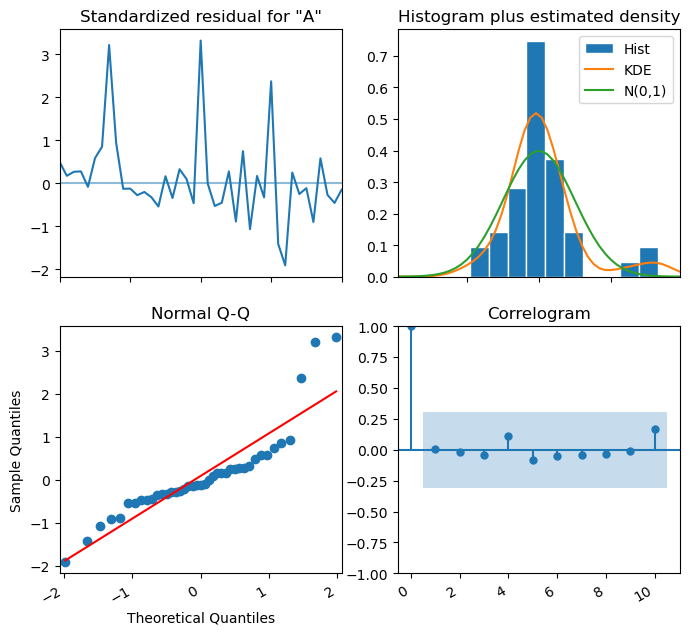

In [12]:
fig = result.plot_diagnostics(figsize=(8, 8))
fig.autofmt_xdate()
plt.show()

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


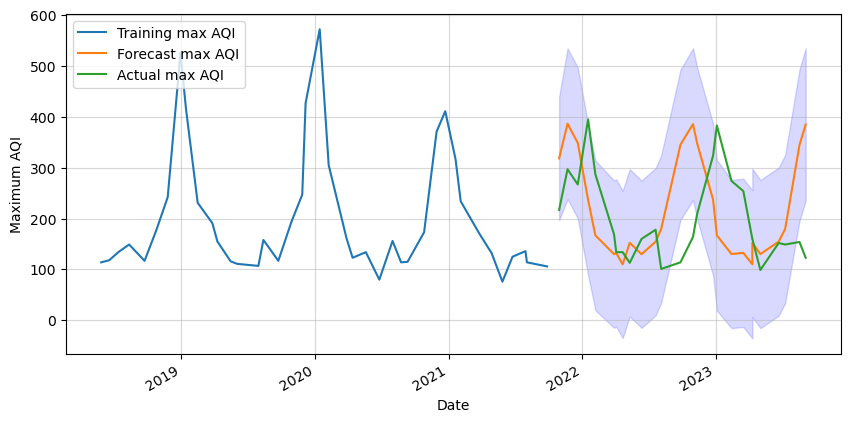

In [8]:
# Get forecast and confidence intervals for two years
forecast = result.get_forecast(steps=26)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_values.index=df_test.index

# Plot forecast with training data
ax = df_train.plot(figsize=(10,5))
forecast_values.plot()
df_test.plot(ax=ax)
plt.fill_between(forecast_values.index, 
                 confidence_intervals['lower AQI'], 
                 confidence_intervals['upper AQI'], 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training max AQI', 
            'Forecast max AQI', 
            'Actual max AQI'], 
           loc='upper left')
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.grid(alpha=0.5)
plt.show()

In [11]:
forecast = result.get_forecast(steps=5)
forecast_values = forecast.predicted_mean

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
# za ovogodišnji oktobar, novembar, decembar, januar i februar
forecast_values

69    165.416781
70    263.268811
71    294.104443
72    237.135347
73    226.681851
Name: predicted_mean, dtype: float64

In [14]:
df_test

,AQI
Date (LT),
2021-10-29 22:00:00,217
2021-11-21 22:00:00,297
2021-12-19 22:00:00,267
2022-01-17 01:00:00,395
2022-02-06 00:00:00,287
2022-03-29 00:00:00,169
2022-04-04 01:00:00,134
2022-04-21 13:00:00,134
2022-05-10 23:00:00,113


In [14]:
confidence_intervals

,lower AQI,upper AQI
41,70.701671,289.798616
42,164.439784,398.139346
43,313.828824,547.528636
44,295.087306,528.787369
45,134.810393,368.510706
46,59.409541,293.110103
47,25.193105,258.216427
48,1.422917,229.595001
49,1.057139,229.229467
50,24.603287,252.775859


In [12]:
# Predicted values and actual values
predicted_values = forecast_values.values
actual_values = df_test.values.flatten()

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(predicted_values - actual_values))
print("MAE:", mae)

# Root Mean Squared Error (RMSE)
mse = np.mean((predicted_values - actual_values) ** 2)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((predicted_values - actual_values) / actual_values)) * 100
print("MAPE:", mape)

MAE: 95.49787925308163
RMSE: 121.85083745579979
MAPE: 52.714659008478584


In [20]:
# Install the library if necessary
!pip install pmdarima

# Import the library
from pmdarima.arima import auto_arima

# Build and fit the AutoARIMA model
model = auto_arima(df_train, 
                   seasonal=True, 
                   m=12, 
                   suppress_warnings=True)
model.fit(df_train)

# Check the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                   41
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood                -155.910
Date:                    Wed, 30 Aug 2023   AIC                            321.819
Time:                            12:51:05   BIC                            328.656
Sample:                                 0   HQIC                           323.960
                                     - 41                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -14.8660      8.407     -1.768      0.077     -31.344       1.612
ar.S.L12      -0.9683      0.254     -3.809      0.000      -1.467      -0.470
ar.S.L24      -0.9253      0.156     -5.950      0.000      -1.230      -0.621
ma.S.L12      -0.8571      1.981     -0.433      0.665      -4.739       3.025
sigma2       205.3131      0.012   1.78e+04      0.000     205.291     205.336
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.66   Prob(JB):                         0.38
Heteroskedasticity (H):               1.58   Skew:                             0.00
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.17e+21. Standard errors may be unstable.
"""

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


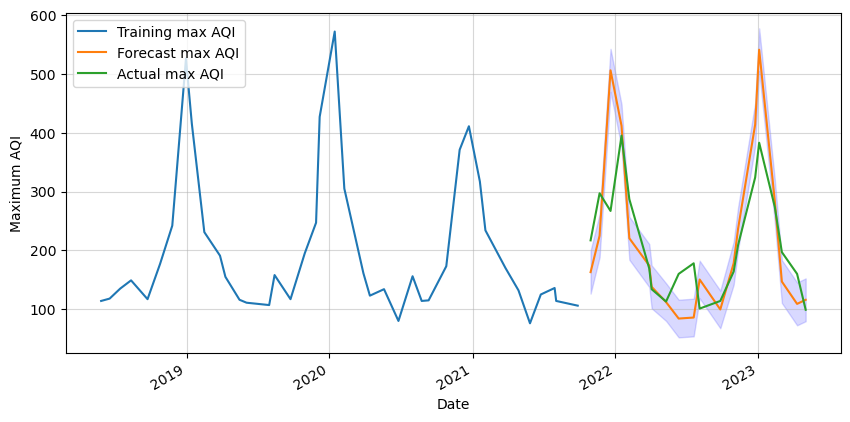

In [22]:
# Make predictions
forecast_auto, conf_int_auto = model.predict(n_periods=20,
                                             return_conf_int=True)
forecast_auto.index=df_test.index
# Get forecast and confidence intervals for two years
forecast_values_auto = forecast_auto
confidence_intervals_auto = conf_int_auto

# Plot forecast with training data
ax = df_train[-12*4:].plot(figsize=(10,5))
forecast_auto.plot(ax=ax)
df_test.plot(ax=ax)
plt.fill_between(forecast_values_auto.index, 
                 confidence_intervals_auto[:,[0]].flatten(), 
                 confidence_intervals_auto[:,[1]].flatten(), 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training max AQI', 
            'Forecast max AQI', 
            'Actual max AQI'], 
           loc='upper left')
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.grid(alpha=0.5)
plt.show()

In [23]:
# Predicted values and actual values
predicted_values_auto = forecast_auto.values
actual_values = df_test.values.flatten()

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(predicted_values_auto - actual_values))
print("MAE:", mae)

# Root Mean Squared Error (RMSE)
mse = np.mean((predicted_values_auto - actual_values) ** 2)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((predicted_values_auto - actual_values) / actual_values)) * 100
print("MAPE:", mape)

MAE: 55.44661895536795
RMSE: 79.53072193557958
MAPE: 25.151141858621283
